# <center>Перенос обучения
>**Идея переноса обучения** — это преодоление изолированной парадигмы обучения и использование знаний, полученных для одной задачи, к решению связанных с ней задач.
## <center>Перенос обучения и его стратегии
>**Перенос обучения** — это метод машинного обучения, при котором модель, разработанная для одной задачи, повторно используется в качестве отправной точки для модели при выполнении другой задачи.

Давайте разберёмся в отличиях переноса обучения от традиционного подхода к обучению.

Традиционное обучение проходит исключительно на основе конкретных задач, наборов данных и обучения на них индивидуальных моделей. Не сохраняется никаких знаний, которые можно было бы перенести от одной модели к другой. 

>Перенос обучения позволит вам выйти за рамки конкретных задач. Вы сможете использовать знания (функции, веса и т. д.), полученные из обученных ранее моделей, для обучения новых и даже для решения таких проблем, как маленький размер выборки для новой задачи.

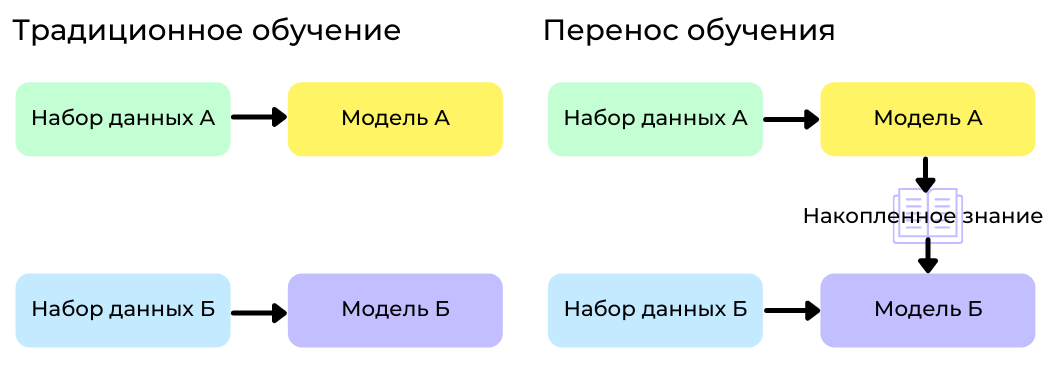

В сфере компьютерного зрения существуют различные сети глубокого обучения с высокой производительностью (иногда такой же или даже лучше, чем у человека). Вы уже знакомы с такими архитектурами, как *VGG*, *GoogLeNet*, а также семейством архитектур *ResNET*. Эти предварительно обученные модели составляют основу переноса обучения в контексте глубокого обучения.

Можно выделить **два основных фактора, от которых зависят стратегии переноса обучения**:
* объём новой выборки;
* её схожесть с исходным набором данных.

### ИСПОЛЬЗОВАНИЕ ГОТОВЫХ, ПРЕДВАРИТЕЛЬНО ОБУЧЕННЫХ МОДЕЛЕЙ ДЛЯ ВЫДЕЛЕНИЯ ОТЛИЧИТЕЛЬНЫХ ПРИЗНАКОВ
Системы и модели глубокого обучения — это многоуровневые архитектуры, которые изучают различные признаки на разных уровнях.

На рисунке ниже изображён пример проблемы распознавания лиц, где начальные слои сети изучают очень общие признаки объектов, а последующие уровни изучают особенности, специфичные для конкретной задачи.

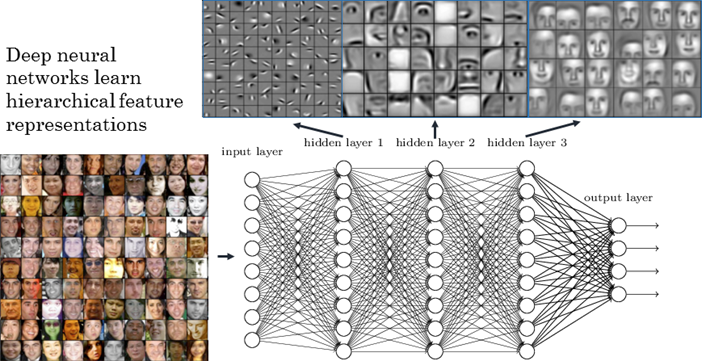

Такая многоуровневая архитектура позволяет нам использовать предварительно обученную сеть без её последнего слоя в качестве фиксированного экстрактора признаков для решения других поставленных задач.  

Использование предобученных сетей для выделения признаков релевантно тогда, когда набор данных Б аналогичен по содержанию набору А. Из-за схожести двух наборов данных мы предполагаем, что отличительные признаки в модели А подойдут и для набора Б.

Существует **два способа реализации выделения признаков**:

1. Данные из набора Б пропускаются через свёрточную основу предобученной модели А. Мы получаем предсказания модели А на новых данных. Результат предсказаний записывается, а затем пропускается через созданный полносвязный слой, подходящий для новой задачи Б.

2. Модель А дополняется полносвязными слоями. Затем мы «замораживаем» свёрточную основу модели А, чтобы при обучении её коэффициенты не изменялись. Данный способ позволяет производить аугментацию данных, поэтому можно заранее подготовить и увеличить исходный датасет.

### ТОНКАЯ НАСТРОЙКА ПРЕДОБУЧЕННЫХ СЕТЕЙ
>**Тонкая настройка**, или **дообучение** — это более сложный метод, при котором мы не просто заменяем последний слой (для классификации/регрессии), но также выборочно переобучаем некоторые из предыдущих слоёв. 

При тонкой настройке мы не ограничиваемся переобучением только полносвязных слоёв классификатора — мы будем переобучать также стадию извлечения признаков, то есть свёрточный блок сети А.

Возникает вопрос: **должны ли мы замораживать слои в сети, чтобы использовать их в качестве экстракторов признаков, или мы также должны настраивать слои в процессе?**

Ответ на данный вопрос зависит от сценария, который у нас есть. Давайте подробно рассмотрим каждый из них.

#### **Небольшой и похожий набор данных**
Если новый набор данных небольшой и похож на исходные данные обучения, то мы следуем такому алгоритму:

1. Удалить последний слой полносвязной сети (классификатора).

2. Добавить новый полносвязный слой, размер вывода которого равен количеству классов в новом наборе данных.

3. Заморозить все веса из предварительно обученной сети.

4. Обновить веса нового полносвязного слоя во время обучения.

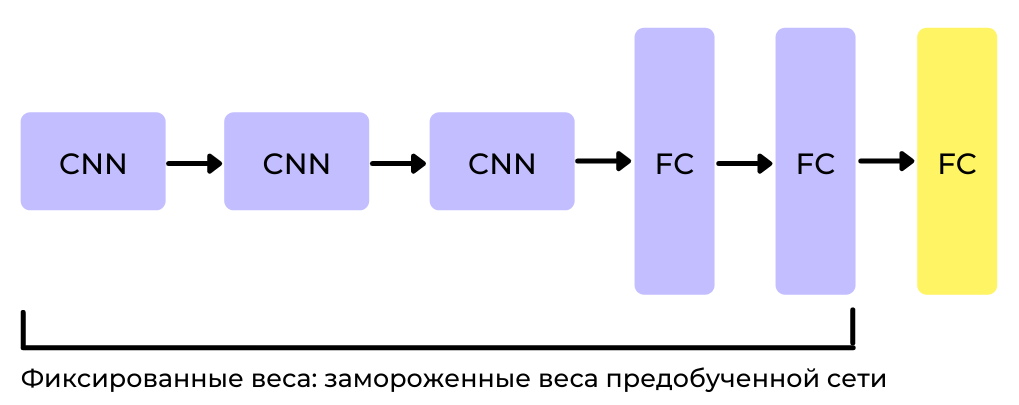

#### **Небольшой и отличающийся набор данных**
Если новый набор данных небольшой и отличается от исходных обучающих данных, подход следующий:

1. Удалить последний слой полносвязной сети и несколько слоёв *CNN* в конце сети.

2. Добавить новый полносвязной слой, размер вывода которого равен количеству классов в новом наборе данных.

3. Заморозить все веса из оставшейся предварительно обученной сети CNN.

4. Обновить веса нового полносвязного слоя во время обучения.

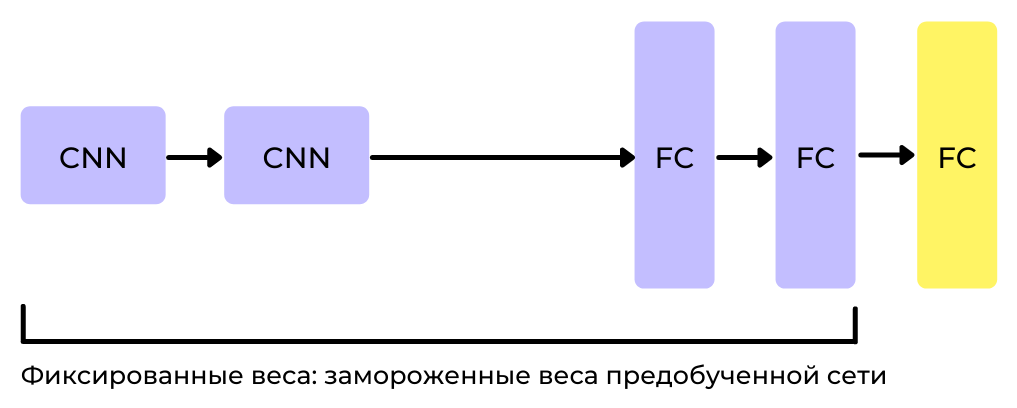

#### **Большой и похожий набор данных**
Если новый набор данных большой и похож на исходные данные обучения, алгоритм следующий:

1. Удалить последний слой полносвязной сети.

2. Добавить новый полносвязный слой, размер вывода которого равен количеству классов в новом наборе данных.

3. Заморозить все веса из оставшейся предварительно обученной сети CNN.

4. Инициализировать веса из предварительно обученной сети.

5. Обновить веса нового полносвязного слоя во время обучения.

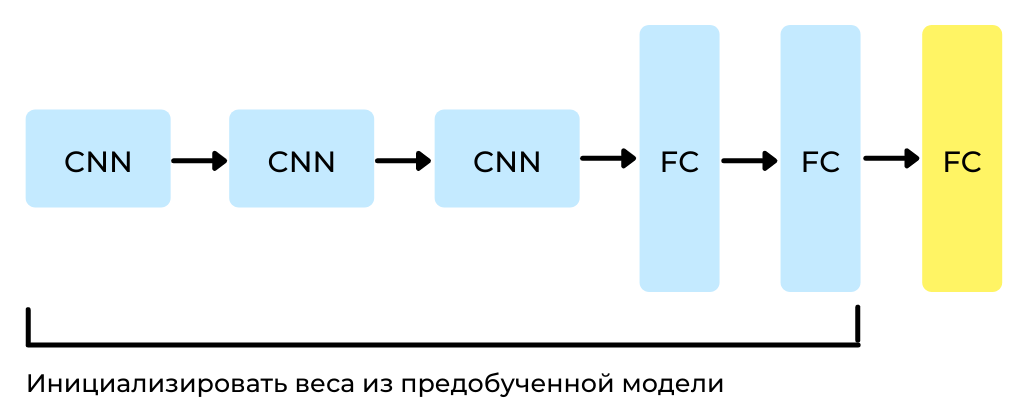

#### **Большой и отличающийся набор данных**
Если новый набор данных большой и отличается от исходных обучающих данных, подход может быть следующим:

1. Удалить последний слой полносвязной сети.

2. Добавить новый полносвязный слой, размер вывода которого равен количеству классов в новом наборе данных.

3. Случайно инициализировать веса из предварительно обученной сети.

4. Произвести тонкую настройку всей сети.

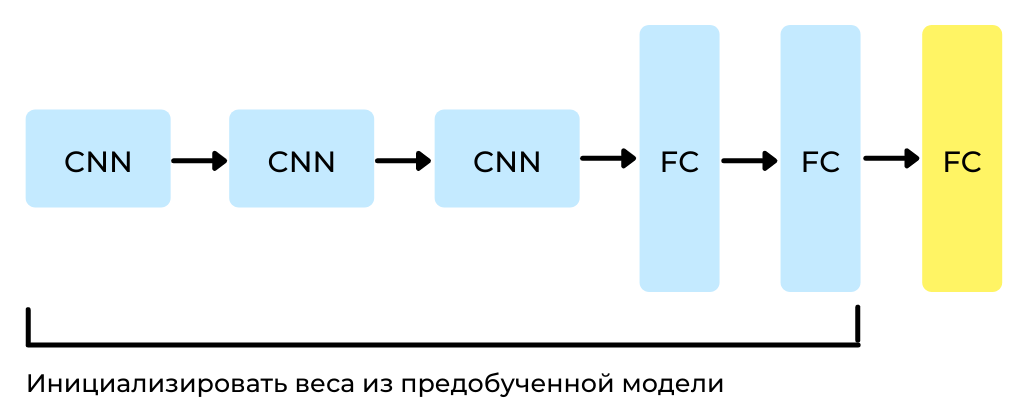

Перенос обучения — техника, позволяющая использовать накопленные знания предобученных моделей в решении новых задач.

Предобученные модели активно используются двумя способами:
* в качестве экстрактора признаков для новой модели;
* для тонкой настройки под новую задачу.


## <center>Преимущества и подводные камни
Благодаря использованию предварительно обученных моделей перенос обеспечивает различные преимущества, такие как экономия времени на обучение, повышение точности модели и необходимость в меньшем объёме обучающих данных.

Но, как и у почти любой другой технологии, помимо преимуществ, у переноса обучения есть несколько ограничений.

#### **ПРОБЛЕМА ОТРИЦАТЕЛЬНОГО ПЕРЕНОСА**
>Если перенос обучения заканчивается снижением производительности или точности новой модели, это называется **отрицательным переносом**.

Перенос работает только в том случае, если исходная и целевая задачи обеих моделей достаточно схожи.

Если обучающие данные, необходимые для новой задачи, слишком далеки от данных старой задачи, то обученные модели могут работать хуже, чем ожидалось. Независимо от того, что разработчики могут думать о схожести двух наборов обучающих данных, алгоритмы не всегда могут с ними соглашаться.

В настоящее время нет конкретных стандартов относительно того, какие задачи связаны или как алгоритмы решают, какие задачи связаны, что затрудняет поиск решений для проблемы отрицательного переноса.

#### **ПРОБЛЕМА ПЕРЕОБУЧЕНИЯ**
Переобучение — существенное ограничение почти для всех технологий прогнозирования. Это также одно из распространённых предубеждений в больших данных.

В контексте переноса обучения переобучение происходит тогда, когда новая модель изучает в обучающих данных детали и шумы, которые негативно влияют на её результаты.

